In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from hc_lib.plots.figlib import FigureLibrary
import seaborn

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'galhisub_test_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

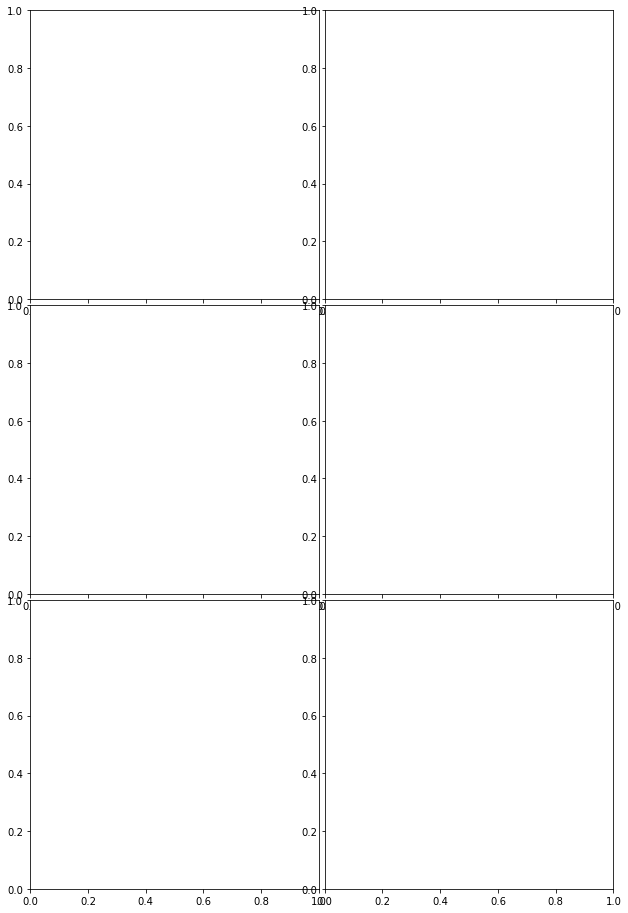

In [3]:
# threshold
ip = {'color_cut':'0.60', 'species':'stmass'}

thdefs = ['low-threshold', 'mid-threshold', 'high-threshold', 'higher-threshold']
bindefs = ['low-bin', 'mid-bin', 'high-bin', 'higher-bin']
rmp = {'gal_res':thdefs + ['diemer']}

flib = FigureLibrary(galfile, 'pk')
flib.createFigGrid(3,2, panel_length = 4)
rmp = {'gal_res':bindefs + ['diemer']}



figarr = flib.arrangeResults(ip, 'color', ['resolved','blue','red'], 'space', ['real','redshift'], 'gal_res', rmp)
fig, panels = flib.getFig()


In [4]:
blue_colors = seaborn.color_palette('Blues', 4)
red_colors = seaborn.color_palette('Reds', 4)
grey_colors = seaborn.color_palette('binary', 4)
# blue_colors = blue_colors[2:]
# red_colors = red_colors[2:]
# grey_colors = grey_colors[2:]
# blue_colors = seaborn.color_palette('winter', 4)


In [5]:
for rc in flib.results:
    if rc.props['color'] == 'resolved' and rc.props['space'] == 'real' and rc.props['gal_res'] not in rmp['gal_res']:
        figarr[0,0].append(rc)
for rc in flib.results:
    if rc.props['color'] == 'resolved' and rc.props['space'] == 'redshift' and rc.props['gal_res'] not in rmp['gal_res']:
        figarr[0,1].append(rc)

flib.setResultArray(figarr)

[[print(len(figarr[i,j])) for i in range(figarr.shape[0])] for j in range(figarr.shape[1])]

4
4
4
4
4
4


[[None, None, None], [None, None, None]]

In [6]:
# make bins plots

colors = {}
labels = {}
for bn in thdefs:
    if 'higher' in bn:
        idx = 3
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^{11}$ $\\leq$ M$_{*}$ / M$_{\\odot}$'

    elif 'low' in bn:
        idx = 0
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '1.4 x 10$^8$ $\\leq$ M$_{*}$ / M$_{\\odot}$'
    elif 'mid' in bn:
        idx = 1
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^9$ $\\leq$ M$_{*}$ / M$_{\\odot}$'
    elif 'high' in bn:
        idx = 2
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^{10}$ $\\leq$ M$_{*}$ / M$_{\\odot}$'

dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for bn in thdefs:
            col = figarr[idx][0].props['color']
            
            ip = {'gal_res':bn}
            fkw = {'color':colors[bn][col], 'label':labels[bn], 'alpha':0.9}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
    

In [7]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':10, 'loc':'upper right'}
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
colkw['ha'] = 'left'; colkw['va']= 'bottom'
flib.rowLabels(['All Galaxies', 'Blue Galaxies', 'Red Galaxies'], txt_kwargs = colkw)
flib.addLegend(idx = (2,1), kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', subscript = '\\rm{gal}', txt_kwargs = {'rotation':'vertical'})

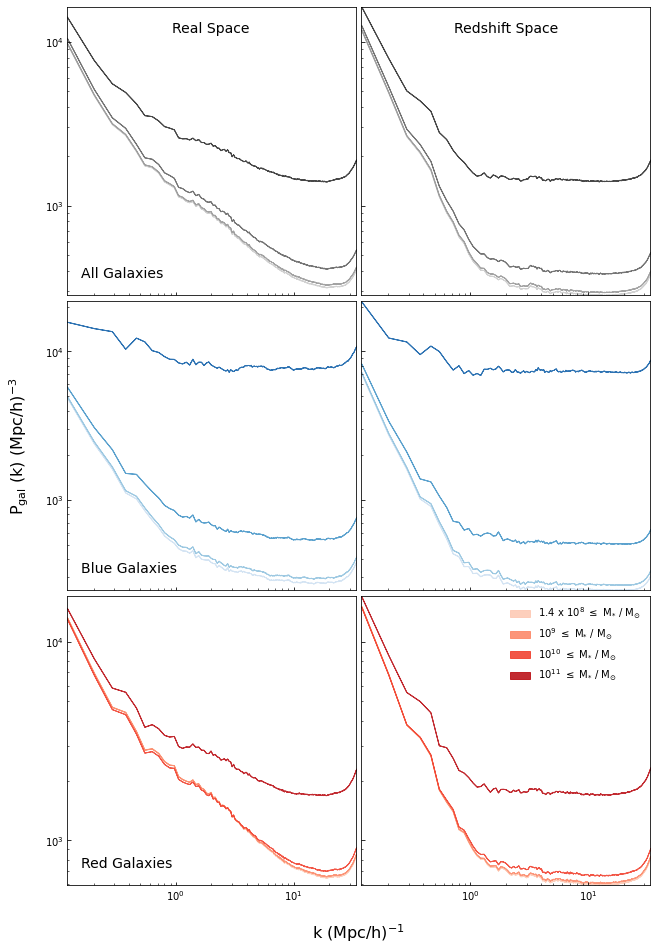

In [8]:
fig

In [9]:
fig.savefig('galaxy_threshold_pk.pdf')

In [10]:
col_props = flib.getPropVals('color')
col_props.remove('all')
row_props = thdefs
figarr = flib.figarr
coltxt = []
rowtxt = []
rowcol = []
colcol = []
counts= np.zeros((len(row_props), len(col_props)), dtype=object)
for i in range(len(row_props)):
    for j in range(len(col_props)):
        iprops = {'color': col_props[j], 'gal_res':row_props[i], 'space':'real'}
        match = flib.getMatchingResults(iprops, {})
        if len(match) > 1:
            print('too many matches')
        match = match[0]
        counts[i,j] = str(match.count)
        if i == 0:
            if iprops['color'] == 'resolved':
                colcol.append('grey')
                coltxt.append('All Galaxies')
            else:
                if iprops['color'] == 'blue':
                    colcol.append('cornflowerblue')
                else:
                    colcol.append('indianred')
                coltxt.append(iprops['color'].capitalize() + ' Galaxies')
        if j == 0:
            rowtxt.append(labels[match.props['gal_res']])
            rowcol.append(colors[match.props['gal_res']]['red'])

  

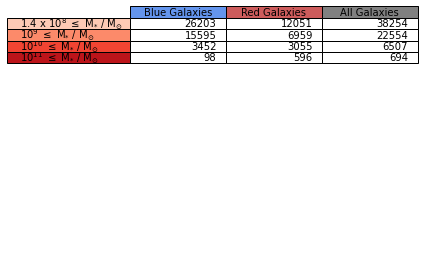

In [11]:
tablefig, ax = plt.subplots()
tablefig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=counts, colLabels = coltxt, colColours = colcol, rowLabels = rowtxt, rowColours = rowcol, loc = 'top')
tablefig.tight_layout()

In [12]:
tablefig.savefig('galaxy_threshold_table.pdf')